# **2. Visualization + EDA**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./data/cleaned_chess_games.csv')
data.head(3)

,Event,WhiteElo,W_ES,BlackElo,B_ES,ECO,PG-MovesCount,White-Mistakes,Black-Mistakes,W-WP,B-WP,AN,W,B,Termination
0,Blitz,1761,0.510072,1754,0.489928,C30,13,8,12,0.451226,0.548774,1. e4 { [%eval 0.27] } 1... e5 { [%eval 0.27] ...,1,0,Time forfeit
1,Bullet,1964,0.491366,1970,0.508634,B00,10,2,2,0.495683,0.504317,1. e4 { [%eval 0.27] } 1... b6 { [%eval 0.51] ...,1,0,Time forfeit
2,Classical,1597,0.280081,1761,0.719919,C00,18,11,7,0.799240,0.200760,1. e4 { [%eval 0.22] } 1... e6 { [%eval 0.41] ...,0,1,Time forfeit


## (1) Initial Visualization

We will first visualize the columns from the initially cleaned data.

### 1) ```Event``` Distribution

Distribution of game types across the entire dataset.

<Axes: xlabel='Event', ylabel='count'>

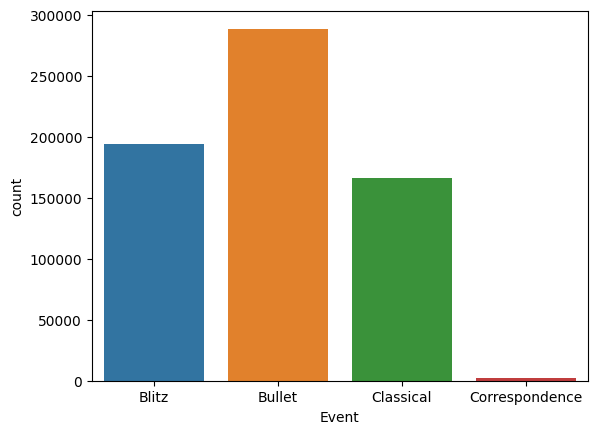

In [3]:
# Visualize the distrbution of Event
sns.countplot(x='Event', data=data)

There are very few Correspondence games (no time limit) while there seems to be overwhelming number of Bullet games (very short games).

### 2) Elo ratings distribution

#### a) ```WhiteElo``` Distribution & Normality Check

Check if the Elo ratings of the White side are normally distributed.

In [19]:
from scipy.stats import shapiro

In [22]:
def check_normality(col):
    stat, p = shapiro(data[col])
    
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian, Data is normally distributed')
    else:
        print('Probably not Gaussian, Data is not normally distributed')

/Users/yijisuk/opt/anaconda3/envs/sc1015/lib/python3.11/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=0.999, p=0.000
Probably not Gaussian, Data is not normally distributed


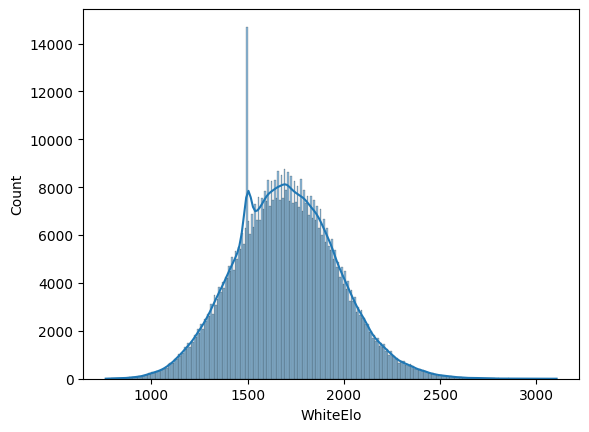

In [23]:
# Visualize the distribution of White Elo
sns.histplot(data['WhiteElo'], kde=True)

# Confirm that the distribution of White Elo is normal
check_normality('WhiteElo')

#### b) ```BlackElo``` Distribution and Normality Check

Check if the Elo ratings of the Black side are normally distributed.

/Users/yijisuk/opt/anaconda3/envs/sc1015/lib/python3.11/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=0.998, p=0.000
Probably not Gaussian, Data is not normally distributed


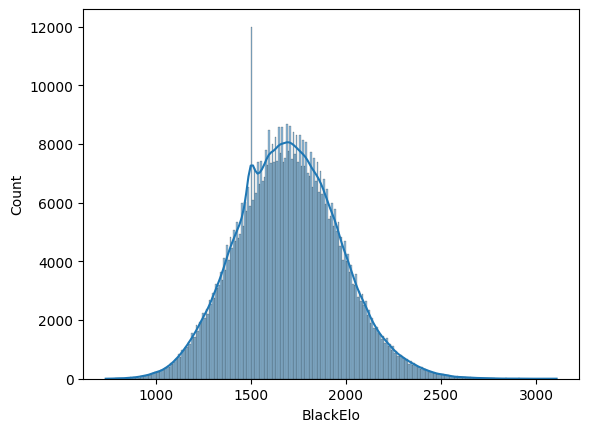

In [24]:
# Visualize the distribution of Black Elo
sns.histplot(data['BlackElo'], kde=True)

# Confirm that the distribution of Black Elo is normal
check_normality('BlackElo')

We can expect a bump at the 1500 mark as new accounts start with 1500 ELO. Other than that, the ELO seems to be very well distributed just by looking at it. However, p-value is very very low, which proves otherwise.

### 3) Estimated Scores Distribution

#### a) ```W_ES``` Distribution

Distribution of the estimated scores of the White side.

<Axes: xlabel='W_ES', ylabel='Count'>

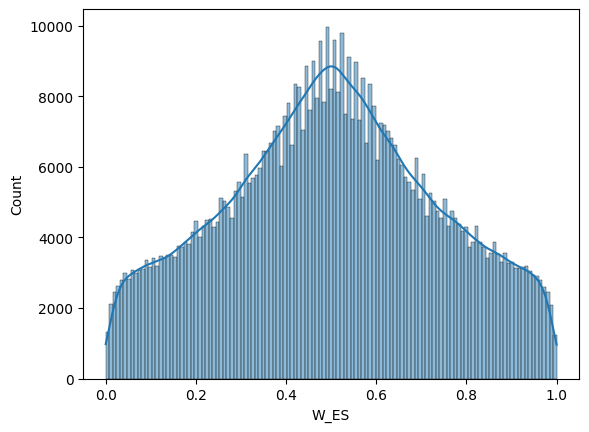

In [25]:
# Visualize the distribution of W_ES
sns.histplot(data['W_ES'], kde=True)

#### b) ```B_ES``` Distribution

Distribution of the estimated scores of the Black side.

<Axes: xlabel='B_ES', ylabel='Count'>

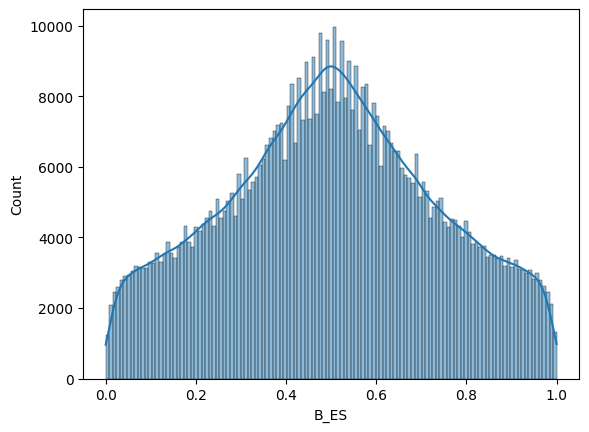

In [26]:
# Visualize the distribution of B_ES
sns.histplot(data['B_ES'], kde=True)

As expected since `W_ES` and `B_ES` are normalised ELO.

### 4) Winning Probability Distribution

#### a) ```W-WP``` Distribution

Distribution of the winning probabilities of the White side.

<Axes: xlabel='W-WP', ylabel='Count'>

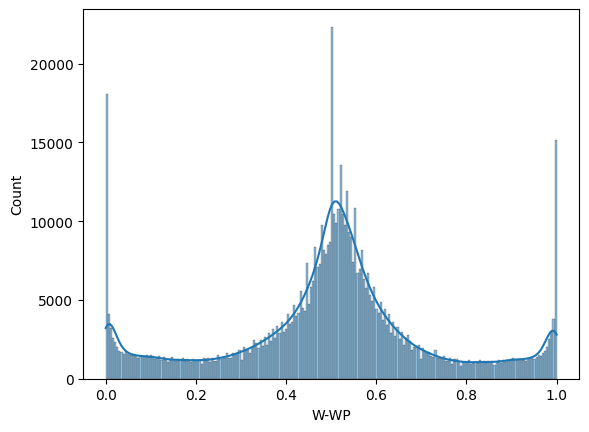

In [28]:
# Visualize the distribution of W-WP
sns.histplot(data['W-WP'], kde=True)

#### b) ```B-WP``` Distribution

Distribution of the winning probabilities of the Black side.

<Axes: xlabel='B-WP', ylabel='Count'>

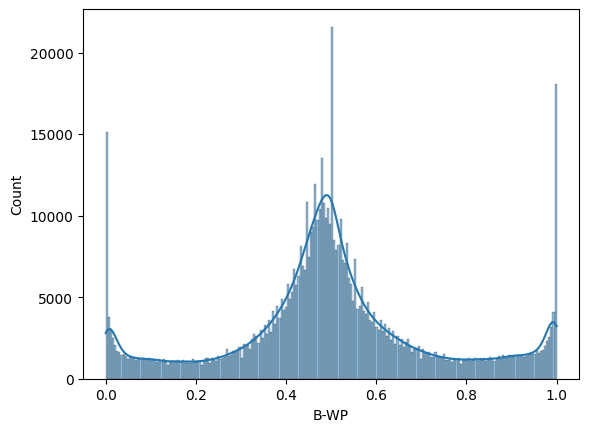

In [29]:
# Visualize the distribution of B-WP
sns.histplot(data['B-WP'], kde=True)

A rather weird figure since I expected the formula to result in a sinusoidal curve. The evaluation score might not be a good replacement for centipawn loss.

### 5) ```PG-MovesCount``` Distribution

Distribution of pre-game movement counts

<Axes: xlabel='PG-MovesCount', ylabel='Count'>

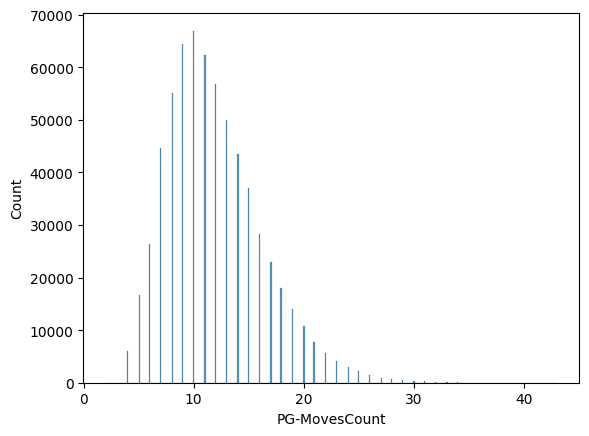

In [7]:
# Visualize the distribution of PG-MovesCount
sns.histplot(data['PG-MovesCount'], kde=False)

Most games started their mid-game at around the 10 move mark, which means that our definitions used for extracting the mid-point move count were satisfactory.

### 6) Mistakes Distribution

#### a) ```White-Mistakes``` Distribution

Distribution of the mistakes count on the White side.

<Axes: xlabel='White-Mistakes', ylabel='Count'>

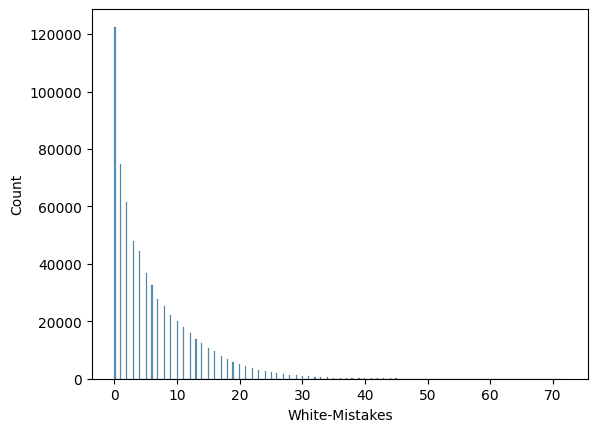

In [8]:
# Visualize the distribution of White-Mistakes
sns.histplot(data['White-Mistakes'], kde=False)

#### b) ```Black-Mistakes``` Distribution

Visualize the distribution of the mistakes count on the Black side.

<Axes: xlabel='Black-Mistakes', ylabel='Count'>

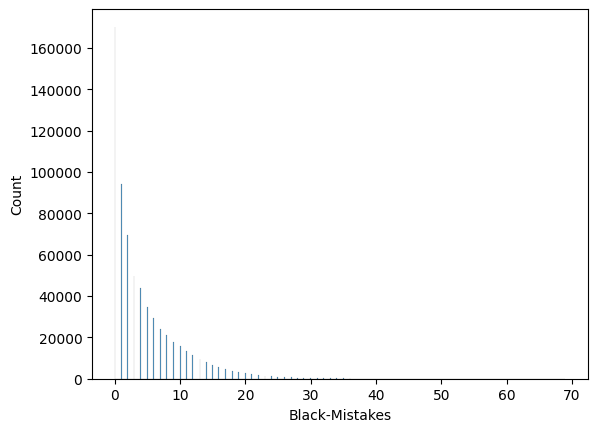

In [118]:
# Visualize the distribution of Black-Mistakes
sns.histplot(data['Black-Mistakes'], kde=False)

Unexpectedly nice distribution for the mistake scores. Most players did not make that much mistakes pre mid-game.

### 7) Win/Loss Distribution

Check if losses and wins are distributed in an equal/similar ratio

#### a) ```W``` Distribution

<Axes: xlabel='W', ylabel='count'>

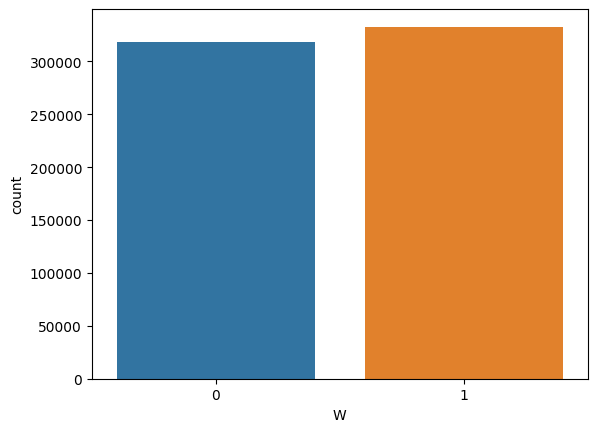

In [11]:
# Visualize the distribution of W
sns.countplot(x='W', data=data)

#### b) ```B``` Distribution

<Axes: xlabel='B', ylabel='count'>

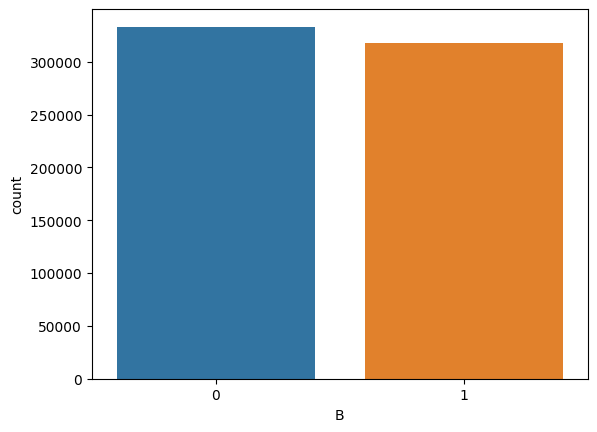

In [12]:
# Visualize the distribution of B
sns.countplot(x='B', data=data)

Win/Loss for both sides are almost 50-50. However, the White side won more games than they have lost, while the Black side lost more games than they have won. This is expected due to White's inherent advantage when starting first.

### 8) ```Termination``` Distribution

Ratios of respective termination factors.

Time forfeit    34.482621
Checkmate       32.758690
Resignation     32.758690
Name: Termination, dtype: float64


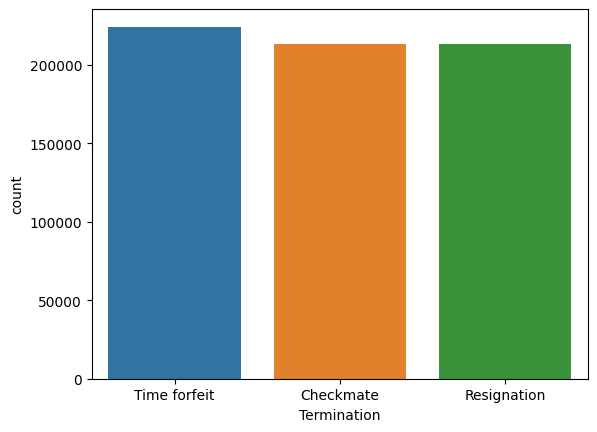

In [120]:
# Visualize the distribution of Termination
sns.countplot(x='Termination', data=data)

# Ratios of Terminations, expressed in percentages
print(data['Termination'].value_counts(normalize=True) * 100)

The distribution is generally constant across factors.

## (2) Correlation Check

### 1) Estimated Score and Win/Loss Result

Correlations on the Estimated Score of White/Black to Win/Loss results of respective sides.

<Axes: title={'center': 'Black Expected Score vs Black Win/Loss'}>

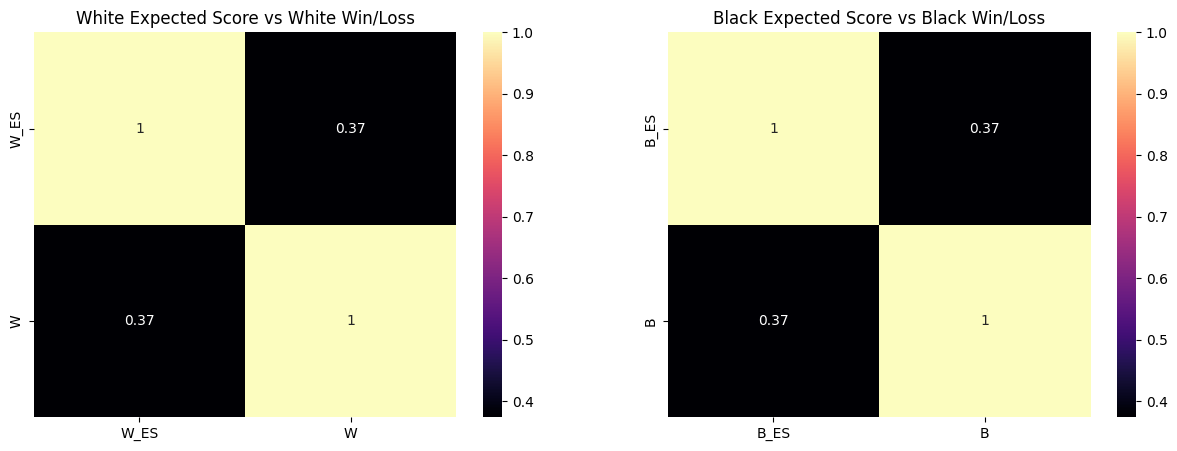

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.set_title('White Expected Score vs White Win/Loss')
sns.heatmap(data[['W_ES', 'W']].corr(), annot=True, cmap='magma', ax=ax1)
ax2.set_title('Black Expected Score vs Black Win/Loss')
sns.heatmap(data[['B_ES', 'B']].corr(), annot=True, cmap='magma', ax=ax2)

We thought that players' ELOs difference would correlate with Win/Loss, however the low correlation score proves otherwise.

### 2) Winning Probability and Win/Loss Result

Correlations on the Winning Probabilities of White/Black to Win/Loss results of respective sides.

<Axes: title={'center': 'Black Win Probability vs Black Win/Loss'}>

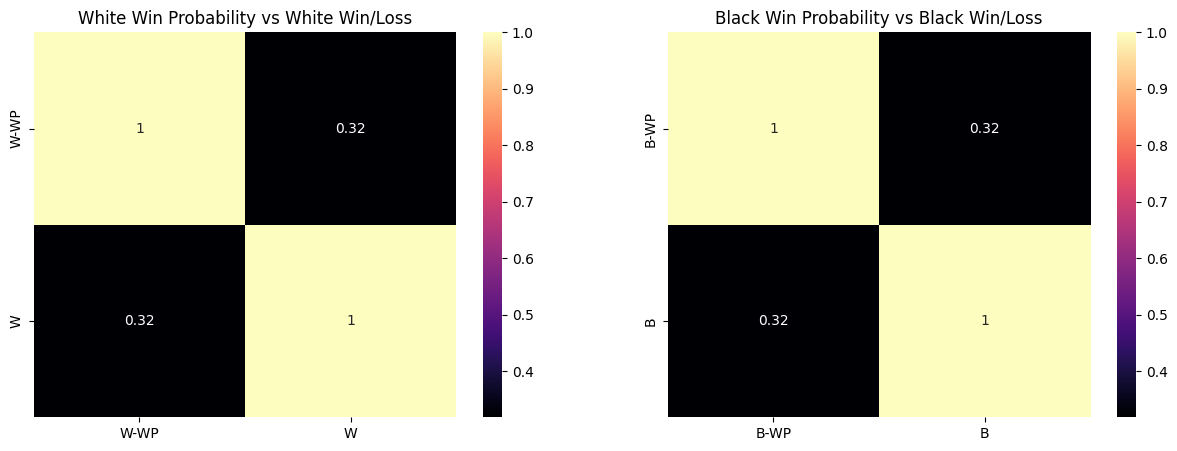

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.set_title('White Win Probability vs White Win/Loss')
sns.heatmap(data[['W-WP', 'W']].corr(), annot=True, cmap='magma', ax=ax1)
ax2.set_title('Black Win Probability vs Black Win/Loss')
sns.heatmap(data[['B-WP', 'B']].corr(), annot=True, cmap='magma', ax=ax2)

Similarly, the mid-game evaluation score is not yet definitive to correlate with Win/Loss.

### 3) Estimated Score and Termination

Percentage distribution of Estimated Score ranges on different Termination factors.

In [77]:
es = data[['W_ES', 'B_ES', 'Termination']]

# Categorize estimated scores in the bins of 0.1
def categorize_es(es):

    if es <= 0.1: return '0.0-0.1'
    elif es <= 0.2: return '0.1-0.2'
    elif es <= 0.3: return '0.2-0.3'
    elif es <= 0.4: return '0.3-0.4'
    elif es <= 0.5: return '0.4-0.5'
    elif es <= 0.6: return '0.5-0.6'
    elif es <= 0.7: return '0.6-0.7'
    elif es <= 0.8: return '0.7-0.8'
    elif es <= 0.9: return '0.8-0.9'
    elif es <= 1.0: return '0.9-1.0'

es['W_ES_Cat'] = es['W_ES'].apply(categorize_es)
es['B_ES_Cat'] = es['B_ES'].apply(categorize_es)

/var/folders/3b/h5pkwjcn3lv68t_r_r1x1dm00000gn/T/ipykernel_9085/1558293031.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  es['W_ES_Cat'] = es['W_ES'].apply(categorize_es)
/var/folders/3b/h5pkwjcn3lv68t_r_r1x1dm00000gn/T/ipykernel_9085/1558293031.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  es['B_ES_Cat'] = es['B_ES'].apply(categorize_es)


<Axes: xlabel='W_ES_Cat', ylabel='Termination'>

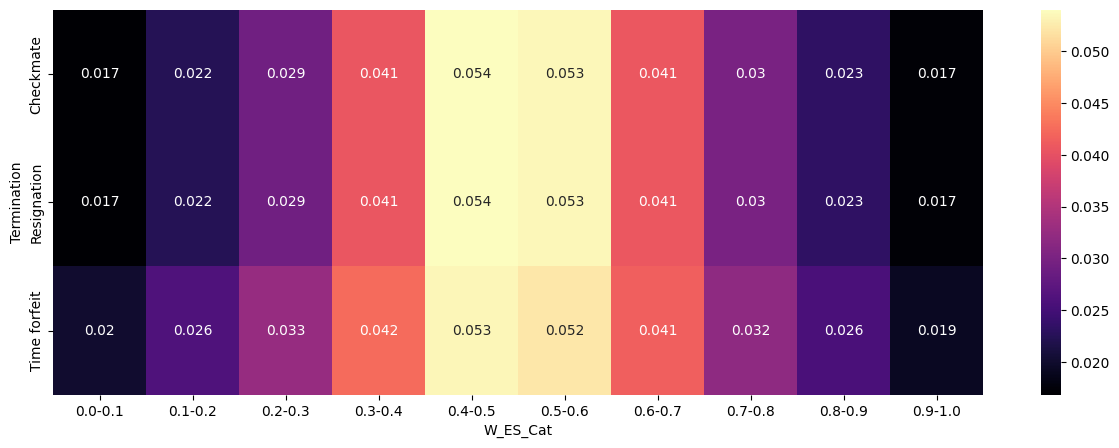

In [84]:
# Crosstable between W_ES_Cat and Termination
plt.figure(figsize=(15, 5))
sns.heatmap(pd.crosstab(es['Termination'], es['W_ES_Cat'], normalize='all'), annot=True, cmap='magma')

<Axes: xlabel='B_ES_Cat', ylabel='Termination'>

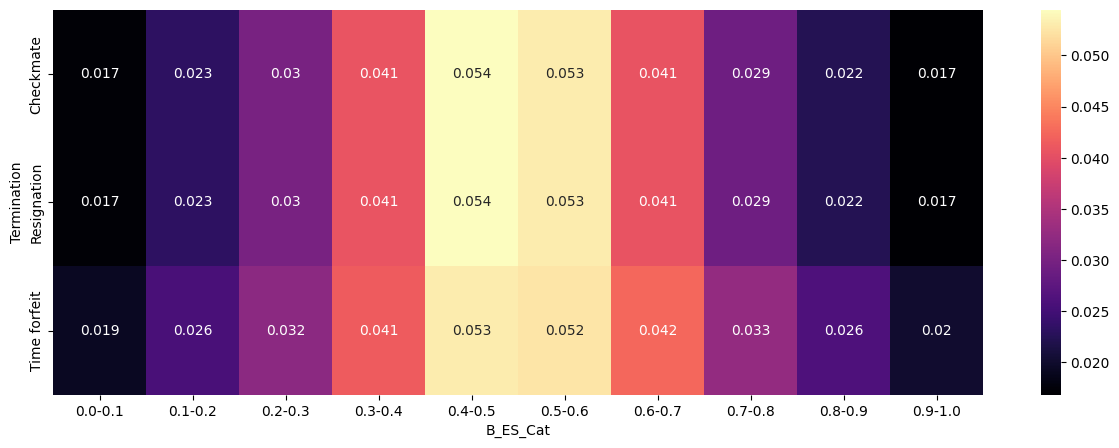

In [86]:
# Crosstable between B_ES_Cat and Termination
plt.figure(figsize=(15, 5))
sns.heatmap(pd.crosstab(es['Termination'], es['B_ES_Cat'], normalize='all'), annot=True, cmap='magma')

Across all three classes of Termination, the most frequent expected scores are in the 0.4-0.6 region and the frequency tapers off in the extremes.

### 4) Winning Probability and Termination

Percentage distribution of Winning Probability ranges on different Termination factors.

In [87]:
wp = data[['W-WP', 'B-WP', 'Termination']]

# Categorize win probabilities in the bins of 0.1
def categorize_wp(wp):

    if wp <= 0.1: return '0.0-0.1'
    elif wp <= 0.2: return '0.1-0.2'
    elif wp <= 0.3: return '0.2-0.3'
    elif wp <= 0.4: return '0.3-0.4'
    elif wp <= 0.5: return '0.4-0.5'
    elif wp <= 0.6: return '0.5-0.6'
    elif wp <= 0.7: return '0.6-0.7'
    elif wp <= 0.8: return '0.7-0.8'
    elif wp <= 0.9: return '0.8-0.9'
    elif wp <= 1.0: return '0.9-1.0'

wp['W-WP_Cat'] = wp['W-WP'].apply(categorize_wp)
wp['B-WP_Cat'] = wp['B-WP'].apply(categorize_wp)

/var/folders/3b/h5pkwjcn3lv68t_r_r1x1dm00000gn/T/ipykernel_9085/2187840195.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wp['W-WP_Cat'] = wp['W-WP'].apply(categorize_wp)
/var/folders/3b/h5pkwjcn3lv68t_r_r1x1dm00000gn/T/ipykernel_9085/2187840195.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wp['B-WP_Cat'] = wp['B-WP'].apply(categorize_wp)


<Axes: xlabel='W-WP_Cat', ylabel='Termination'>

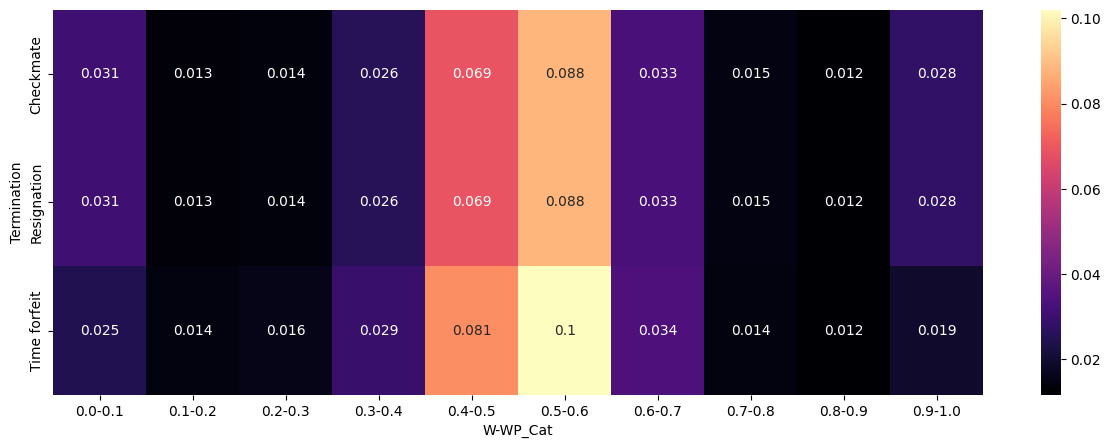

In [88]:
# Crosstable between W-WP_Cat and Termination
plt.figure(figsize=(15, 5))
sns.heatmap(pd.crosstab(wp['Termination'], wp['W-WP_Cat'], normalize='all'), annot=True, cmap='magma')

<Axes: xlabel='B-WP_Cat', ylabel='Termination'>

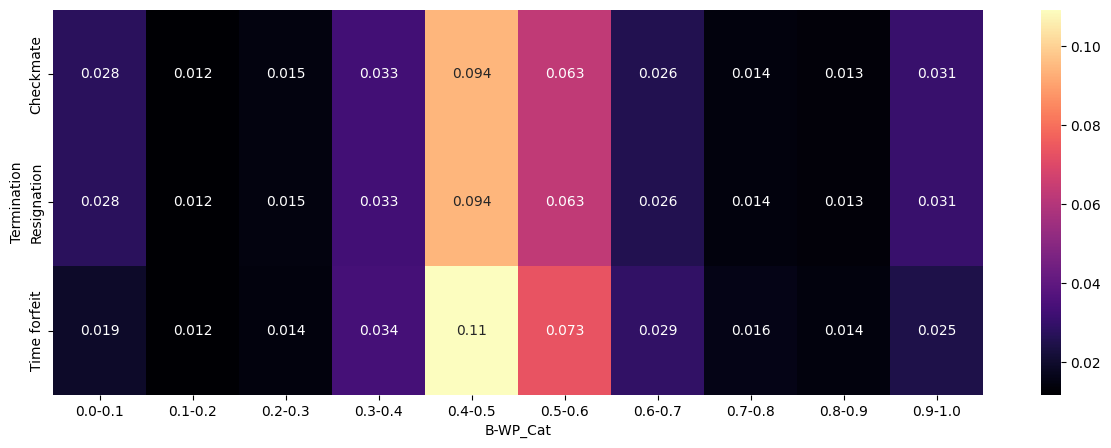

In [89]:
# Crosstable between B-WP_Cat and Termination
plt.figure(figsize=(15, 5))
sns.heatmap(pd.crosstab(wp['Termination'], wp['B-WP_Cat'], normalize='all'), annot=True, cmap='magma')

Similarly, across all three classes of Termination, the most frequent Winning Probability are in the 0.4-0.6 region and the frequency decreases very fast outside this range.

## (3) Feature Engineering

### **A. Commonly Used Openings based on ```ECO```**

We will first visualize the percentage distribution of respective ECOs on Win/Loss results

#### 1-a) Crosstab: ```ECO```  vs ```W```

In [47]:
from scipy.stats import chi2_contingency

def define_dependency(cst):

    _, p, _, _ = chi2_contingency(cst.values)
  
    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')

In [105]:
# Check dependency of ECO to W (White won)
opening_analysis = data[["ECO", "W"]]
opening_crosstab = pd.crosstab(opening_analysis["W"], opening_analysis["ECO"])
define_dependency(opening_crosstab)

p value is 0.0
Dependent (reject H0)


In [104]:
# Check dependency of ECO to Termination
opening_analysis = data[["ECO", "Termination"]]
opening_crosstab = pd.crosstab(opening_analysis["Termination"], opening_analysis["ECO"])
define_dependency(opening_crosstab)

p value is 0.0
Dependent (reject H0)


Here are the percentage distributions of commonly used openings based on ECO, for the White side.

<Axes: xlabel='ECO', ylabel='W'>

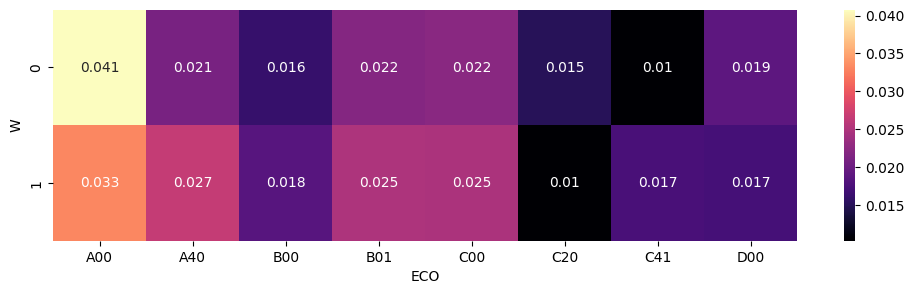

In [49]:
# Visualize percentage distribution of commonly used openings
OP_pct_all = pd.crosstab(opening_analysis["W"], opening_analysis["ECO"], normalize='all')
OP_filtered = OP_pct_all[OP_pct_all > 0.01]
OP_filtered = OP_filtered.dropna(axis=1)

plt.figure(figsize=(12,3))
sns.heatmap(OP_filtered, annot=True, cmap="magma")

#### 1-b) Crosstab: ```ECO``` vs ```B```

In [103]:
# Check dependency of ECO to B (Black won)
opening_analysis = data[["ECO", "B"]]
opening_crosstab = pd.crosstab(opening_analysis["B"], opening_analysis["ECO"])
define_dependency(opening_crosstab)

p value is 0.0
Dependent (reject H0)


In [102]:
# Check dependency of ECO to Termination
opening_analysis = data[["ECO", "Termination"]]
opening_crosstab = pd.crosstab(opening_analysis["Termination"], opening_analysis["ECO"])
define_dependency(opening_crosstab)

p value is 0.0
Dependent (reject H0)


Here are the percentage distributions of commonly used openings based on ECO, for the Black side.

<Axes: xlabel='ECO', ylabel='B'>

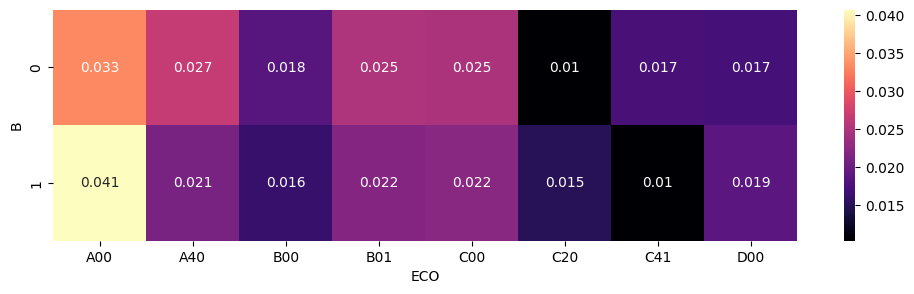

In [51]:
# Visualize percentage distribution of commonly used openings
OP_pct_all = pd.crosstab(opening_analysis["B"], opening_analysis["ECO"], normalize='all')
OP_filtered = OP_pct_all[OP_pct_all > 0.01]
OP_filtered = OP_filtered.dropna(axis=1)

plt.figure(figsize=(12,3))
sns.heatmap(OP_filtered, annot=True, cmap="magma")

#### 2) Crosstab: ```ECO``` vs ```Termination```

Visualize the percentage distribution of respective ECOs on Termination factors.

In [101]:
# Check dependency of ECO to W (White won)
opening_analysis = data[["ECO", "W"]]
opening_crosstab = pd.crosstab(opening_analysis["W"], opening_analysis["ECO"])
define_dependency(opening_crosstab)

p value is 0.0
Dependent (reject H0)


In [100]:
# Check dependency of ECO to B (Black won)
opening_analysis = data[["ECO", "B"]]
opening_crosstab = pd.crosstab(opening_analysis["B"], opening_analysis["ECO"])
define_dependency(opening_crosstab)

p value is 0.0
Dependent (reject H0)


In [99]:
# Check dependency of ECO to Termination
opening_analysis = data[["ECO", "Termination"]]
opening_crosstab = pd.crosstab(opening_analysis["Termination"], opening_analysis["ECO"])
define_dependency(opening_crosstab)

p value is 0.0
Dependent (reject H0)


<Axes: xlabel='ECO', ylabel='Termination'>

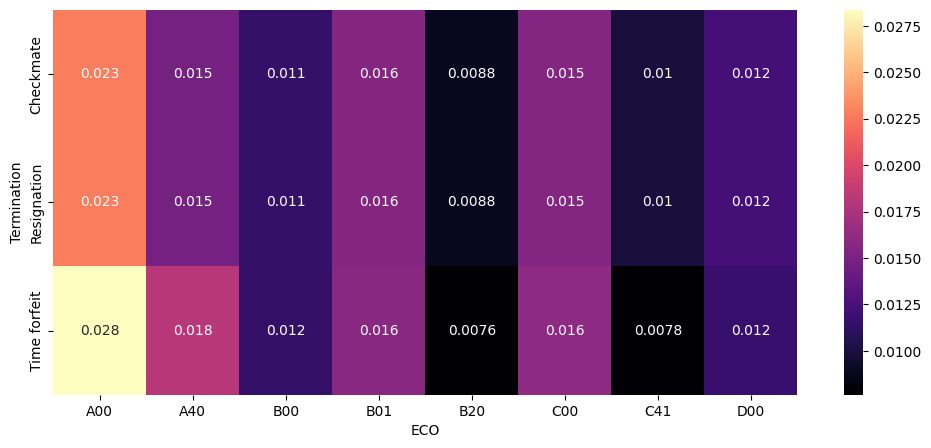

In [53]:
# Visualize percentage distribution of commonly used openings
OP_pct_all = pd.crosstab(opening_analysis["Termination"], opening_analysis["ECO"], normalize='all')
OP_filtered = OP_pct_all[OP_pct_all > 0.0075]
OP_filtered = OP_filtered.dropna(axis=1)

plt.figure(figsize=(12,5))
sns.heatmap(OP_filtered, annot=True, cmap="magma")

From the above crosstabs, we can safely choose `A00`, `A40`, `B00`, `B01`, `B20`, `C00`, `C20`, `C41`, `D00` as our frequently used openings.

### **B. ```ELO``` Superiority**

The second feature will be investigating on ELO Superiority of each White/Black side.

#### White having higher ```ELO``` than Black

The correlation on White having a higher ELO rating than Black, to its Win/Loss result.

In [125]:
# Check dependency of WhiteHigher to W (White won)
white_result = data[["WhiteHigher", "Termination"]]
white_result_crosstab = pd.crosstab(white_result["WhiteHigher"], white_result["Termination"])
define_dependency(white_result_crosstab)

p value is 9.198727873715105e-12
Dependent (reject H0)


<Axes: >

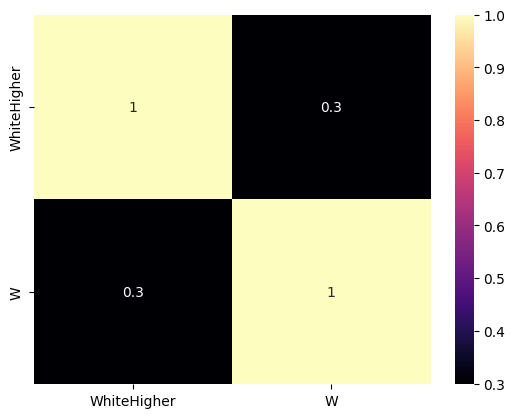

In [60]:
# Correlation between WhiteHigher and W (White won)
data["WhiteHigher"] = data["WhiteElo"] >= data["BlackElo"]
white_result = data[["WhiteHigher", "W"]]
sns.heatmap(white_result.corr(), annot=True, cmap="magma")

In [126]:
# Check dependency of WhiteHigher to Termination on game results
white_result = data[["WhiteHigher", "Termination"]]
white_result_crosstab = pd.crosstab(white_result["WhiteHigher"], white_result["Termination"])
define_dependency(white_result_crosstab)

p value is 9.198727873715105e-12
Dependent (reject H0)


<Axes: xlabel='Termination', ylabel='WhiteHigher'>

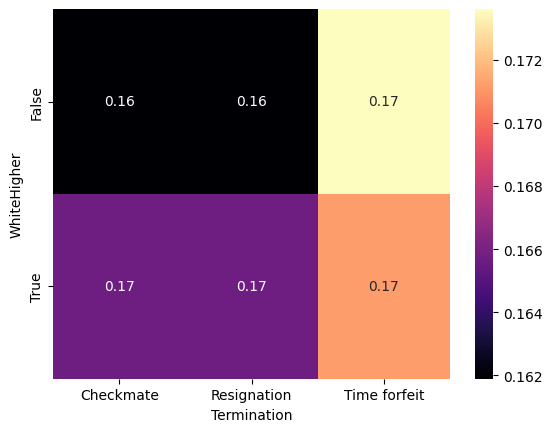

In [65]:
# Visualize percentage distribution of Terminations on game results
white_result_pct_all = pd.crosstab(white_result["WhiteHigher"], white_result["Termination"], normalize='all')
sns.heatmap(white_result_pct_all, annot=True, cmap="magma")

White Superiority seems to have very little correlation with Win/Loss and Terminations.

#### Black having higher ```ELO``` than White

The correlation on Black having a higher ELO rating than White, to its Win/Loss result.

In [127]:
# Check dependency of BlackHigher to B (Black won)
black_result = data[["BlackHigher", "Termination"]]
black_result_crosstab = pd.crosstab(black_result["BlackHigher"], black_result["Termination"])
define_dependency(black_result_crosstab)

p value is 4.479327033592385e-11
Dependent (reject H0)


<Axes: >

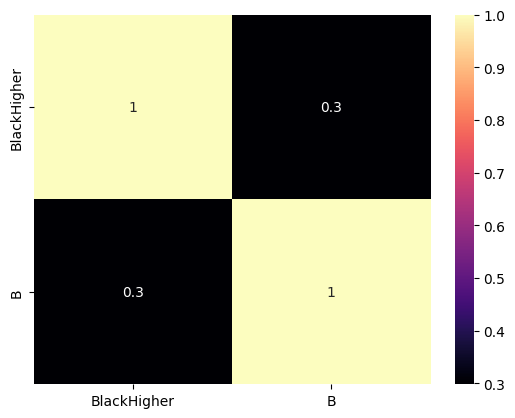

In [61]:
# Correlation between BlackHigher and B (Black won)
data["BlackHigher"] = data["BlackElo"] >= data["WhiteElo"]
black_result = data[["BlackHigher", "B"]]
sns.heatmap(black_result.corr(), annot=True, cmap="magma")

In [128]:
# Check dependency of BlackHigher to Termination on game results
black_result = data[["BlackHigher", "Termination"]]
black_result_crosstab = pd.crosstab(black_result["BlackHigher"], black_result["Termination"])
define_dependency(black_result_crosstab)

p value is 4.479327033592385e-11
Dependent (reject H0)


<Axes: xlabel='Termination', ylabel='BlackHigher'>

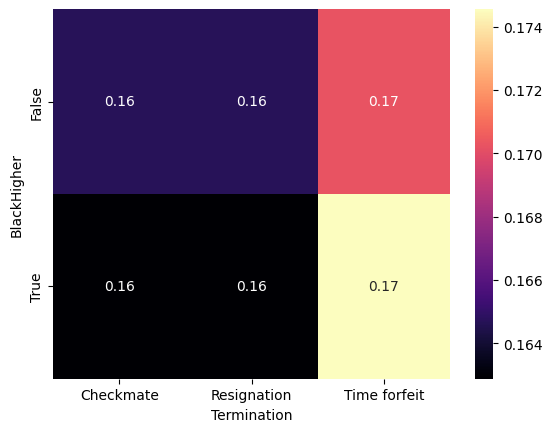

In [129]:
# Visualize percentage distribution of Terminations on game results
black_result_pct_all = pd.crosstab(black_result["BlackHigher"], black_result["Termination"], normalize='all')
sns.heatmap(black_result_pct_all, annot=True, cmap="magma")

Similarly, Black Superiority seems to have very little correlation with Win/Loss and Terminations.

### **C. ```ELO``` Superiority with Commonly used ```ECO``` combined**

Now for this feature, the above two will be combined: ECO and White/Black ELO Superiority.

In [91]:
import math

def organize_features(df):

    df_cpy = df.copy()
    
    # OPC
    # White openings
    WC1 = ['A00', 'B01', 'C00', 'A40']
    WC2 = ['C41', 'D00', 'B00', 'C20']
    WC3 = ['B20']

    # Black openings
    BC1 = ['A00']
    BC2 = ['C00', 'B01', 'A40', 'D00']
    BC3 = ['C20', 'B00', 'B20', 'C41']

    def w_opc(eco):
        if eco in WC1: return "WC1"
        elif eco in WC2: return "WC2"
        elif eco in WC3: return "WC3"
        else: return "N"
    
    def b_opc(eco):
        if eco in BC1: return "BC1"
        elif eco in BC2: return "BC2"
        elif eco in BC3: return "BC3"
        else: return "N"

    df_cpy['W_OPC'] = df_cpy['ECO'].apply(w_opc)
    df_cpy['B_OPC'] = df_cpy['ECO'].apply(b_opc)

    # WS_OPC, BS_OPC
    def ws_opc(whiteElo, blackElo, w_opc):
        if whiteElo >= blackElo:
            return f"1-{w_opc}"
        else:
            return f"0-{w_opc}"
    
    def bs_opc(whiteElo, blackElo, b_opc):
        if blackElo >= whiteElo:
            return f"1-{b_opc}"
        else:
            return f"0-{b_opc}"
    
    elo_opc = df_cpy[["WhiteElo", "BlackElo", "W_OPC", "B_OPC"]]

    elo_opc = elo_opc.assign(WS_OPC=elo_opc.apply(lambda row: ws_opc(row["WhiteElo"], row["BlackElo"], row["W_OPC"]), axis=1))
    elo_opc = elo_opc.assign(BS_OPC=elo_opc.apply(lambda row: bs_opc(row["WhiteElo"], row["BlackElo"], row["B_OPC"]), axis=1))

    df_cpy = pd.concat([df_cpy, elo_opc[["WS_OPC", "BS_OPC"]]], axis=1)

    df_cpy = df_cpy[['Event', 'W_ES', 'B_ES', 
                     'ECO', 'WS_OPC', 'BS_OPC',
                     'PG-MovesCount', 'White-Mistakes', 'Black-Mistakes', 'W-WP', 'B-WP',
                     'AN', 'W', 'B', 'Termination']]
    
    return df_cpy


In [92]:
data_fe = organize_features(data)
data_fe.head(3)

,Event,W_ES,B_ES,ECO,WS_OPC,BS_OPC,PG-MovesCount,White-Mistakes,Black-Mistakes,W-WP,B-WP,AN,W,B,Termination
0,Blitz,0.510072,0.489928,C30,1-N,0-N,13,8,12,0.451226,0.548774,1. e4 { [%eval 0.27] } 1... e5 { [%eval 0.27] ...,1,0,Time forfeit
1,Bullet,0.491366,0.508634,B00,0-WC2,1-BC3,10,2,2,0.495683,0.504317,1. e4 { [%eval 0.27] } 1... b6 { [%eval 0.51] ...,1,0,Time forfeit
2,Classical,0.280081,0.719919,C00,0-WC1,1-BC2,18,11,7,0.799240,0.200760,1. e4 { [%eval 0.22] } 1... e6 { [%eval 0.41] ...,0,1,Time forfeit


#### ```WS_OPC``` vs ```W``` & ```Termination```

Dependency & Percentage distribution of individual factors on White Win/Loss results.

In [110]:
# Check dependency of WS_OPC to W (White won)
white_result = data_fe[["WS_OPC", "W"]]
white_result_crosstab = pd.crosstab(white_result["WS_OPC"], white_result["W"])
define_dependency(white_result_crosstab)

p value is 0.0
Dependent (reject H0)


<Axes: xlabel='WS_OPC', ylabel='W'>

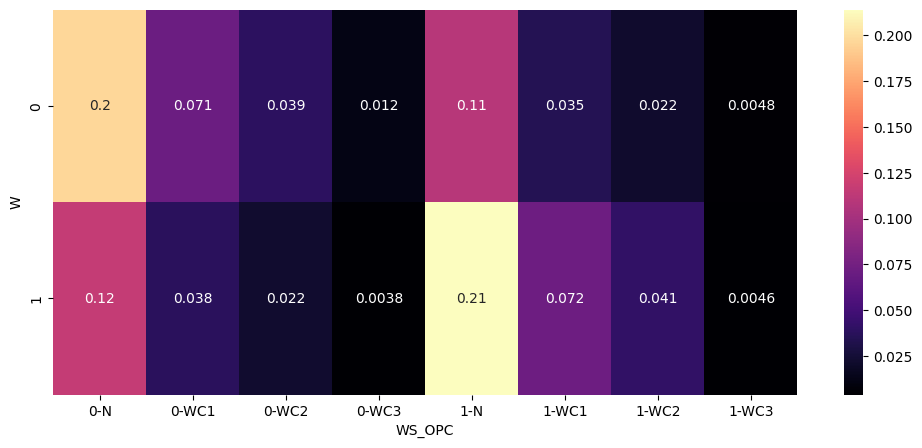

In [112]:
# Visualize percentage distribution of WS_OPC on W (White won)
white_result_pct_all = pd.crosstab(white_result["W"], white_result["WS_OPC"], normalize='all')
plt.figure(figsize=(12,5))
sns.heatmap(white_result_pct_all, annot=True, cmap="magma")

Dependency & Percentage distribution of individual factors on Termination factors.

In [113]:
# Check dependency of WS_OPC to Termination
white_result = data_fe[["WS_OPC", "Termination"]]
white_result_crosstab = pd.crosstab(white_result["WS_OPC"], white_result["Termination"])
define_dependency(white_result_crosstab)

p value is 4.7499432604954055e-181
Dependent (reject H0)


<Axes: xlabel='WS_OPC', ylabel='Termination'>

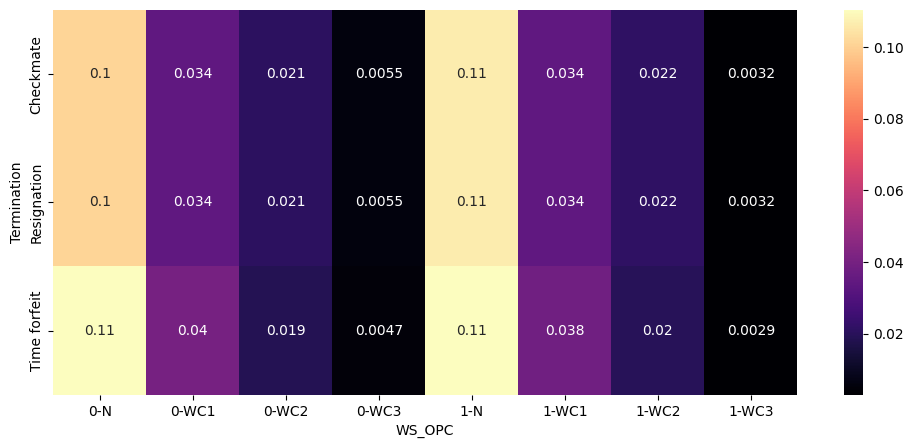

In [108]:
# Visualize percentage distribution of WS_OPC on game results
white_result_pct_all = pd.crosstab(white_result["Termination"], white_result["WS_OPC"], normalize='all')
plt.figure(figsize=(12,5))
sns.heatmap(white_result_pct_all, annot=True, cmap="magma")

#### ```BS_OPC``` vs ```B``` & ```Termination```

Dependency & Percentage distribution of individual factors on Black Win/Loss results.

In [114]:
# Check dependency of BS_OPC to B (Black won)
black_result = data_fe[["BS_OPC", "B"]]
black_result_crosstab = pd.crosstab(black_result["BS_OPC"], black_result["B"])
define_dependency(black_result_crosstab)

p value is 0.0
Dependent (reject H0)


<Axes: xlabel='BS_OPC', ylabel='B'>

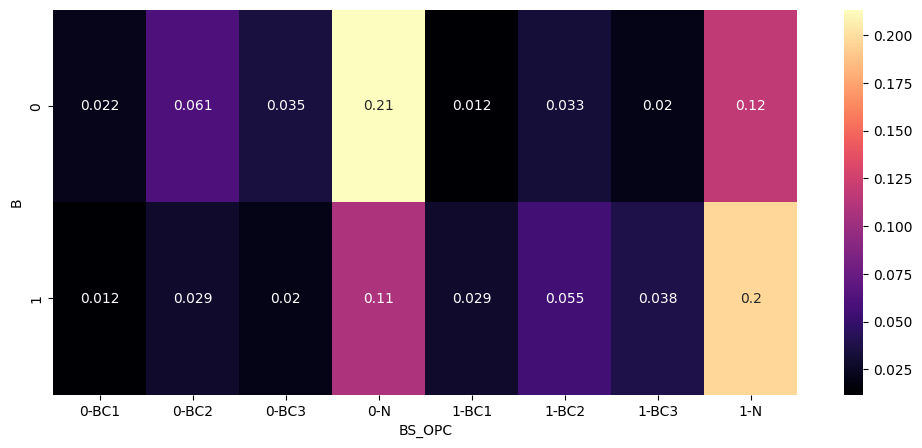

In [115]:
# Visualize percentage distribution of BS_OPC on B (Black won)
black_result_pct_all = pd.crosstab(black_result["B"], black_result["BS_OPC"], normalize='all')
plt.figure(figsize=(12,5))
sns.heatmap(black_result_pct_all, annot=True, cmap="magma")

Dependency & Percentage distribution of individual factors on Termination factors.

In [116]:
# Check dependency of BS_OPC to Termination
black_result = data_fe[["BS_OPC", "Termination"]]
black_result_crosstab = pd.crosstab(black_result["BS_OPC"], black_result["Termination"])
define_dependency(black_result_crosstab)

p value is 1.9332861674532337e-242
Dependent (reject H0)


<Axes: xlabel='BS_OPC', ylabel='Termination'>

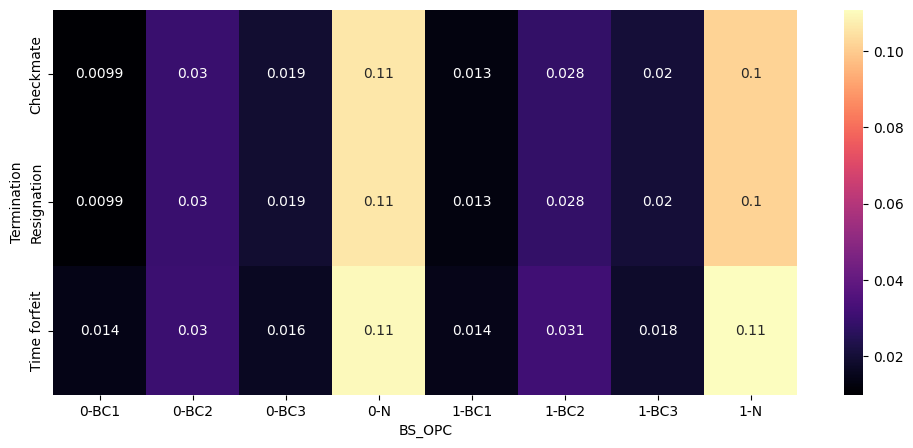

In [117]:
# Visualize percentage distribution of BS_OPC on game results
black_result_pct_all = pd.crosstab(black_result["Termination"], black_result["BS_OPC"], normalize='all')
plt.figure(figsize=(12,5))
sns.heatmap(black_result_pct_all, annot=True, cmap="magma")

From the above four crosstabs, we can see that those that do not use the 'frequent openings' are most frequent here. That is because when non-frequent openings are combined, they are now overwhelmingly more frequent than the other categories.